In [2]:
from cycler import cycler
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker


In [3]:
# plot themeing
plt.rcParams['figure.facecolor'] = '#fdfaf3'
plt.rcParams['axes.facecolor'] = '#fdfaf3'
plt.rcParams['axes.prop_cycle'] = cycler(color=['#0f5499', '#EB5E8D', '#70DCE6', '#9dbf57', '#208fce', '#7f062e', '#c2b7af', '#ce3140'])
plt.rcParams['figure.dpi'] = 300
font_files = mpl.font_manager.findSystemFonts(fontpaths=["/Users/steven/Library/Fonts"])
for font_file in font_files:
    mpl.font_manager.fontManager.addfont(font_file)
    
plt.rcParams['font.family'] = 'Space Mono'

First I format all the numbers in Google Sheets so that they don't use commas.

In [4]:
csv = pd.read_csv("NERC_Electricity_Supply_&_Demand_(ES&D)_Peak Hour Demand-Seasonal.csv")

In [5]:
nel_csv = pd.read_csv("NERC_Electricity_Supply_&_Demand_(ES&D)_NEL-Annual.csv")
# Strip whitespace from column names
nel_csv.columns = nel_csv.columns.str.strip()
nel_csv

Report Year Country Region  Subregion Assessment Area Unit  \
0           1990      CA    MRO          -               -  GWh   
1           1990      CA   NPCC          -               -  GWh   
2           1990      CA   NPCC  Maritimes       Maritimes  GWh   
3           1990      CA   NPCC    Ontario         Ontario  GWh   
4           1990      CA   NPCC     Quebec          Quebec  GWh   
..           ...     ...    ...        ...             ...  ...   
856         2023      CA   WECC          -         WECC-AB  GWh   
857         2023      CA   WECC          -         WECC-BC  GWh   
858         2023   US/MX   WECC          -       WECC-CAMX  GWh   
859         2023      US   WECC          -         WECC-NW  GWh   
860         2023      US   WECC          -         WECC-SW  GWh   

                      Description     Actual     Year 0     Year 1     Year 2  \
0    Net Energy for Load - Annual   32157.00   32204.00   32836.00   33855.00   
1    Net Energy for Load - Annual  308650.00  310273.00  323334.00  334296.00   
2    Net Energy for Load - Annual   21780.00   23235.00   23967.00   24586.00   
3    Net Energy for Load - Annual  140770.00  142738.00  146467.00  151510.00   
4    Net Energy for Load - Annual  146100.00  144300.00  152900.00  158200.00   
..                            ...        ...        ...        ...        ...   
856  Net Energy for Load - Annual   86571.65   87017.75   87785.59   87785.59   
857  Net Energy for Load - Annual   65521.90   64992.70   66094.64   66094.64   
858  Net Energy for Load - Annual  258571.18  263892.21  267248.75  267540.03   
859  Net Energy for Load - Annual  372725.62  365186.52  375452.81  375452.81   
860  Net Energy for Load - Annual  116047.22  117013.99  122559.98  122559.98   

        Year 3     Year 4     Year 5     Year 6     Year 7     Year 8  \
0     35006.00   35832.00   36655.00   37479.00   38426.00   39297.00   
1    344712.00  351460.00  358560.00  368906.00  375491.00  381727.00   
2     25264.00   25954.00   26668.00   27430.00   28221.00   29010.00   
3    154748.00  158306.00  161492.00  166176.00  168970.00  171817.00   
4    164700.00  167200.00  170400.00  175300.00  178300.00  180900.00   
..         ...        ...        ...        ...        ...        ...   
856   88274.24   89018.85   89809.39   90866.78   90779.46   91021.58   
857   67247.31   68197.23   69027.21   69517.93   69974.58   70456.70   
858  270744.06  274134.00  278314.86  282966.47  288013.94  293261.47   
859  386273.71  394213.98  404894.99  416433.65  423330.89  428299.21   
860  126923.99  132457.42  137454.91  141030.98  143292.61  144960.05   

        Year 9    Year 10  
0     40041.00        NaN  
1    389600.00        NaN  
2     29815.00        NaN  
3    174685.00        NaN  
4    185100.00        NaN  
..         ...        ...  
856   91830.54   92732.53  
857   71029.46   71539.14  
858  299570.92  306096.50  
859  432739.17  438144.09  
860  146163.07  148664.70  

[861 rows x 19 columns]

In [6]:
unique_regions = csv['Region'].unique()
unique_years = csv['Report Year'].unique()

# Now  grab only the country level assessments
# There's always a chance that for some of these regions, they don't have the just country level. But ignore for now
country_level_data = csv[(csv['Subregion'] == "-")]

print(country_level_data.shape)
summer_country_level_data = country_level_data[country_level_data['Description'] == "Peak Hour Demand - Summer"]
print(summer_country_level_data.shape)


# Now we also need to aggregate by assessment area, in order to handle the post 2010 reporting
summer_country_and_region_level_data = summer_country_level_data.groupby(['Report Year', 'Country', 'Region', 'Unit', 'Description'], as_index=False).aggregate(
    {"Actual": "sum", "Year 0": "sum", "Year 1": "sum", "Year 2": "sum", "Year 3": "sum", "Year 4": "sum", "Year 5": "sum", "Year 6": "sum", "Year 7": "sum", "Year 8": "sum", "Year 9": "sum", "Year 10": "sum"})
# Nice so we see we've taken half the data corresponding to summer peaks

(1132, 19)
(566, 19)


In [7]:
# Repeat for NEL
# Years & Regions are exactly the same between the sheets

# Now  grab only the country level assessments
# There's always a chance that for some of these regions, they don't have the just country level. But ignore for now

# Grab rows where subregion is zero. 
nel_country_level_data = nel_csv[(nel_csv['Subregion'] == "-")]

# Matches the count of just summer 
print(nel_country_level_data.shape)
# We don't need to filter to just summer demand because we're using NEL.
numeric_columns = ['Actual', 'Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10']

# Now we also need to aggregate by assessment area, in order to handle the post 2010 reporting
nel_country_and_region_level_data = nel_country_level_data.groupby(['Report Year', 'Country', 'Region', 'Unit', 'Description'], as_index=False).aggregate(
    {"Actual": "sum", "Year 0": "sum", "Year 1": "sum", "Year 2": "sum", "Year 3": "sum", "Year 4": "sum", "Year 5": "sum", "Year 6": "sum", "Year 7": "sum", "Year 8": "sum", "Year 9": "sum", "Year 10": "sum"})
nel_country_level_data

(566, 19)


Report Year Country Region Subregion Assessment Area Unit  \
0           1990      CA    MRO         -               -  GWh   
1           1990      CA   NPCC         -               -  GWh   
5           1990      CA   WECC         -               -  GWh   
7           1990      US   ECAR         -               -  GWh   
8           1990      US    TRE         -           ERCOT  GWh   
..           ...     ...    ...       ...             ...  ...   
856         2023      CA   WECC         -         WECC-AB  GWh   
857         2023      CA   WECC         -         WECC-BC  GWh   
858         2023   US/MX   WECC         -       WECC-CAMX  GWh   
859         2023      US   WECC         -         WECC-NW  GWh   
860         2023      US   WECC         -         WECC-SW  GWh   

                      Description     Actual     Year 0     Year 1     Year 2  \
0    Net Energy for Load - Annual   32157.00   32204.00   32836.00   33855.00   
1    Net Energy for Load - Annual  308650.00  310273.00  323334.00  334296.00   
5    Net Energy for Load - Annual   85286.00   89445.00   92218.00   95203.00   
7    Net Energy for Load - Annual  439832.00  447644.00  456863.00  464675.00   
8    Net Energy for Load - Annual  207304.00  205819.00  212854.00  221175.00   
..                            ...        ...        ...        ...        ...   
856  Net Energy for Load - Annual   86571.65   87017.75   87785.59   87785.59   
857  Net Energy for Load - Annual   65521.90   64992.70   66094.64   66094.64   
858  Net Energy for Load - Annual  258571.18  263892.21  267248.75  267540.03   
859  Net Energy for Load - Annual  372725.62  365186.52  375452.81  375452.81   
860  Net Energy for Load - Annual  116047.22  117013.99  122559.98  122559.98   

        Year 3     Year 4     Year 5     Year 6     Year 7     Year 8  \
0     35006.00   35832.00   36655.00   37479.00   38426.00   39297.00   
1    344712.00  351460.00  358560.00  368906.00  375491.00  381727.00   
5     98029.00  100872.00  103325.00  105814.00  108098.00  110530.00   
7    470626.00  477081.00  484596.00  492468.00  499849.00  507164.00   
8    227236.00  231673.00  237270.00  244485.00  251514.00  258569.00   
..         ...        ...        ...        ...        ...        ...   
856   88274.24   89018.85   89809.39   90866.78   90779.46   91021.58   
857   67247.31   68197.23   69027.21   69517.93   69974.58   70456.70   
858  270744.06  274134.00  278314.86  282966.47  288013.94  293261.47   
859  386273.71  394213.98  404894.99  416433.65  423330.89  428299.21   
860  126923.99  132457.42  137454.91  141030.98  143292.61  144960.05   

        Year 9    Year 10  
0     40041.00        NaN  
1    389600.00        NaN  
5    112972.00        NaN  
7    514586.00        NaN  
8    266642.00        NaN  
..         ...        ...  
856   91830.54   92732.53  
857   71029.46   71539.14  
858  299570.92  306096.50  
859  432739.17  438144.09  
860  146163.07  148664.70  

[566 rows x 19 columns]

In [8]:
# Now we want a dataframe for each year's prediction timeseries.
# So concretely, I want 1 dataframe for each row, that dataframe has a column of years and a column of predictions.
# Another way of doing this is to create a giant dataframe with all actual years and somehow remap the columns to the actual years. That might be better actually....›
# summer_country_level_data.apply(print, axis=1)
pivoted_summer_country_and_region_level_data = summer_country_and_region_level_data.melt(id_vars=['Report Year', 'Country', 'Region', 'Unit', 'Description'])
pivoted_summer_country_and_region_level_data

Report Year Country     Region Unit                Description variable  \
0            1990      CA        MRO   MW  Peak Hour Demand - Summer   Actual   
1            1990      CA       NPCC   MW  Peak Hour Demand - Summer   Actual   
2            1990      CA       WECC   MW  Peak Hour Demand - Summer   Actual   
3            1990      US       ECAR   MW  Peak Hour Demand - Summer   Actual   
4            1990      US       FRCC   MW  Peak Hour Demand - Summer   Actual   
...           ...     ...        ...  ...                        ...      ...   
5143         2023      US         RF   MW  Peak Hour Demand - Summer  Year 10   
5144         2023      US       SERC   MW  Peak Hour Demand - Summer  Year 10   
5145         2023      US  TRE-ERCOT   MW  Peak Hour Demand - Summer  Year 10   
5146         2023      US       WECC   MW  Peak Hour Demand - Summer  Year 10   
5147         2023   US/MX       WECC   MW  Peak Hour Demand - Summer  Year 10   

             value  
0       4427.00000  
1      39740.00000  
2      11105.00000  
3      75442.00000  
4      27972.00000  
...            ...  
5143  160971.00000  
5144  197293.00000  
5145   92296.30564  
5146  104894.61171  
5147   65448.73048  

[5148 rows x 7 columns]

In [9]:
# Now pivot the NEL data
pivoted_nel_country_and_region_level_data = nel_country_and_region_level_data.melt(id_vars=['Report Year', 'Country', 'Region', 'Unit', 'Description'])
pivoted_nel_country_and_region_level_data

Report Year Country     Region Unit                   Description  \
0            1990      CA        MRO  GWh  Net Energy for Load - Annual   
1            1990      CA       NPCC  GWh  Net Energy for Load - Annual   
2            1990      CA       WECC  GWh  Net Energy for Load - Annual   
3            1990      US       ECAR  GWh  Net Energy for Load - Annual   
4            1990      US       FRCC  GWh  Net Energy for Load - Annual   
...           ...     ...        ...  ...                           ...   
5143         2023      US         RF  GWh  Net Energy for Load - Annual   
5144         2023      US       SERC  GWh  Net Energy for Load - Annual   
5145         2023      US  TRE-ERCOT  GWh  Net Energy for Load - Annual   
5146         2023      US       WECC  GWh  Net Energy for Load - Annual   
5147         2023   US/MX       WECC  GWh  Net Energy for Load - Annual   

     variable       value  
0      Actual    32157.00  
1      Actual   308650.00  
2      Actual    85286.00  
3      Actual   439832.00  
4      Actual   142959.00  
...       ...         ...  
5143  Year 10   909622.00  
5144  Year 10  1017087.00  
5145  Year 10   542454.60  
5146  Year 10   586808.79  
5147  Year 10   306096.50  

[5148 rows x 7 columns]

In [10]:
# Function to extract the year offset and calculate Forecast Year, thanks Chat GPT!
def get_forecast_year(row):
    if row['variable'].startswith('Year'):
        year_offset = int(row['variable'].split()[1])
    else:
        # This accounts for 'Actual' which is the actual power for the Report Year - 1
        year_offset = -1
    return row['Report Year'] + year_offset

In [11]:
# Apply the function to create the 'Forecast Year' column. We use .loc as a r
pivoted_summer_country_and_region_level_data.loc[:,'Forecast Year'] = pivoted_summer_country_and_region_level_data.apply(get_forecast_year, axis=1)
#pivoted_summer_country_level_data[pivoted_summer_country_level_data['Report Year'] == 2023]


#Now filter out zero year 10 values
pivoted_summer_country_and_region_level_data = pivoted_summer_country_and_region_level_data.loc[(
    pivoted_summer_country_and_region_level_data['value'] != 0)]
pivoted_summer_country_and_region_level_data

Report Year Country     Region Unit                Description variable  \
0            1990      CA        MRO   MW  Peak Hour Demand - Summer   Actual   
1            1990      CA       NPCC   MW  Peak Hour Demand - Summer   Actual   
2            1990      CA       WECC   MW  Peak Hour Demand - Summer   Actual   
3            1990      US       ECAR   MW  Peak Hour Demand - Summer   Actual   
4            1990      US       FRCC   MW  Peak Hour Demand - Summer   Actual   
...           ...     ...        ...  ...                        ...      ...   
5143         2023      US         RF   MW  Peak Hour Demand - Summer  Year 10   
5144         2023      US       SERC   MW  Peak Hour Demand - Summer  Year 10   
5145         2023      US  TRE-ERCOT   MW  Peak Hour Demand - Summer  Year 10   
5146         2023      US       WECC   MW  Peak Hour Demand - Summer  Year 10   
5147         2023   US/MX       WECC   MW  Peak Hour Demand - Summer  Year 10   

             value  Forecast Year  
0       4427.00000           1989  
1      39740.00000           1989  
2      11105.00000           1989  
3      75442.00000           1989  
4      27972.00000           1989  
...            ...            ...  
5143  160971.00000           2033  
5144  197293.00000           2033  
5145   92296.30564           2033  
5146  104894.61171           2033  
5147   65448.73048           2033  

[4868 rows x 8 columns]

In [12]:
# Apply the function to create the 'Forecast Year' column. We use .loc as a r
pivoted_nel_country_and_region_level_data.loc[:,'Forecast Year'] = pivoted_nel_country_and_region_level_data.apply(get_forecast_year, axis=1)
#pivoted_summer_country_level_data[pivoted_summer_country_level_data['Report Year'] == 2023]


#Now filter out zero year 10 values
pivoted_nel_country_and_region_level_data = pivoted_nel_country_and_region_level_data.loc[(
    pivoted_nel_country_and_region_level_data['value'] != 0)]
debug = pivoted_nel_country_and_region_level_data[(pivoted_nel_country_and_region_level_data['Forecast Year'] == 2014) | (pivoted_nel_country_and_region_level_data['Forecast Year'] == 2015)]
debug[debug['Region'] == 'MISO'].head(50)

# And drop the one year where MISO forgot to report. Report year 2018, 10th year of forecasting.
print(pivoted_nel_country_and_region_level_data[
      (pivoted_nel_country_and_region_level_data['Region'] == 'MRO') &
      (pivoted_nel_country_and_region_level_data['Report Year'] == 2018)])
pivoted_nel_country_and_region_level_data = pivoted_nel_country_and_region_level_data.drop(pivoted_nel_country_and_region_level_data[
      (pivoted_nel_country_and_region_level_data['Region'] == 'MRO') &
      (pivoted_nel_country_and_region_level_data['Report Year'] == 2018) & 
      (pivoted_nel_country_and_region_level_data['Forecast Year'] == 2028)].index)

print(pivoted_nel_country_and_region_level_data[
      (pivoted_nel_country_and_region_level_data['Region'] == 'MRO') &
      (pivoted_nel_country_and_region_level_data['Report Year'] == 2018) & 
      (pivoted_nel_country_and_region_level_data['Forecast Year'] == 2028)])


      Report Year Country Region Unit                   Description variable  \
366          2018      CA    MRO  GWh  Net Energy for Load - Annual   Actual   
370          2018      US    MRO  GWh  Net Energy for Load - Annual   Actual   
795          2018      CA    MRO  GWh  Net Energy for Load - Annual   Year 0   
799          2018      US    MRO  GWh  Net Energy for Load - Annual   Year 0   
1224         2018      CA    MRO  GWh  Net Energy for Load - Annual   Year 1   
1228         2018      US    MRO  GWh  Net Energy for Load - Annual   Year 1   
1653         2018      CA    MRO  GWh  Net Energy for Load - Annual   Year 2   
1657         2018      US    MRO  GWh  Net Energy for Load - Annual   Year 2   
2082         2018      CA    MRO  GWh  Net Energy for Load - Annual   Year 3   
2086         2018      US    MRO  GWh  Net Energy for Load - Annual   Year 3   
2511         2018      CA    MRO  GWh  Net Energy for Load - Annual   Year 4   
2515         2018      US    MRO  GWh  N

In [13]:
# Now we plot!

def plot_all_regions(pivoted_input_data):
    countries = pivoted_input_data['Country'].unique()
    regions = pivoted_input_data['Region'].unique()
    fig, axs = plt.subplots(len(regions), len(countries), figsize=(25, 45), sharex=True, sharey=True)
    for country_index, country in enumerate(countries):
        for region_index, region in enumerate(regions):
            filtered_data = pivoted_input_data[(
                pivoted_input_data['Country'] == country) &
            (pivoted_input_data['Region'] == region)]
    
            actual = filtered_data[filtered_data['variable'] == "Actual"]
            forecast = filtered_data[filtered_data['variable'] != "Actual"]
            axs[region_index, country_index].set_title(f"{region}, {country}")
            axs[region_index, country_index].tick_params(labelbottom=True)
            axs[region_index, country_index].plot(actual['Forecast Year'], actual['value'], linewidth=2, color='black')
            for report_year in forecast['Report Year'].unique():
                # Get that years forecast timeseries
                forecast_for_report_year = forecast[forecast['Report Year'] == report_year]
                # PLot the forecasts, make them lower opacity and dotted
                axs[region_index, country_index].plot(forecast_for_report_year['Forecast Year'], forecast_for_report_year['value'], alpha=.4)
def plot_all_regions_us(pivoted_input_data):
    regions = pivoted_input_data['Region'].unique()
    rows = 2
    fig, axs = plt.subplots(1, len(regions), figsize=(40, 5), sharex=True, sharey=True)
    for region_index, region in enumerate(regions):
        filtered_data = pivoted_input_data[(pivoted_input_data['Region'] == region)]
        
        actual = filtered_data[filtered_data['variable'] == "Actual"]
        forecast = filtered_data[filtered_data['variable'] != "Actual"]
        axs[region_index].set_title(f"{region}, US")
        axs[region_index].tick_params(labelbottom=True)
        axs[region_index].plot(actual['Forecast Year'], actual['value'], linewidth=2, color='black')
        for report_year in forecast['Report Year'].unique():
            # Get that years forecast timeseries
            forecast_for_report_year = forecast[forecast['Report Year'] == report_year]
            # PLot the forecasts, make them lower opacity and dotted
            axs[region_index].plot(forecast_for_report_year['Forecast Year'], forecast_for_report_year['value'], alpha=.4)
plot_all_regions(pivoted_summer_country_and_region_level_data)

In [14]:
# Now we plot the NEL!

plot_all_regions(pivoted_nel_country_and_region_level_data)

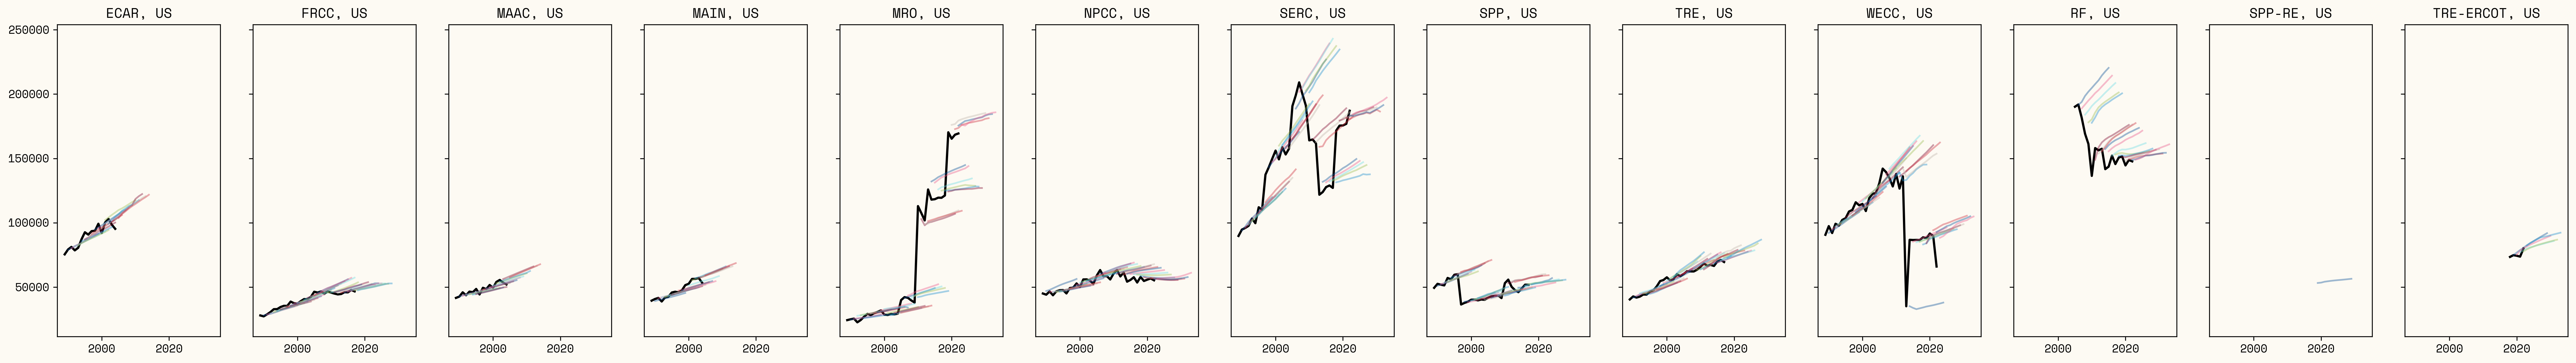

In [22]:
plot_all_regions_us(pivoted_summer_country_and_region_level_data[pivoted_summer_country_and_region_level_data['Country'] == 'US'])

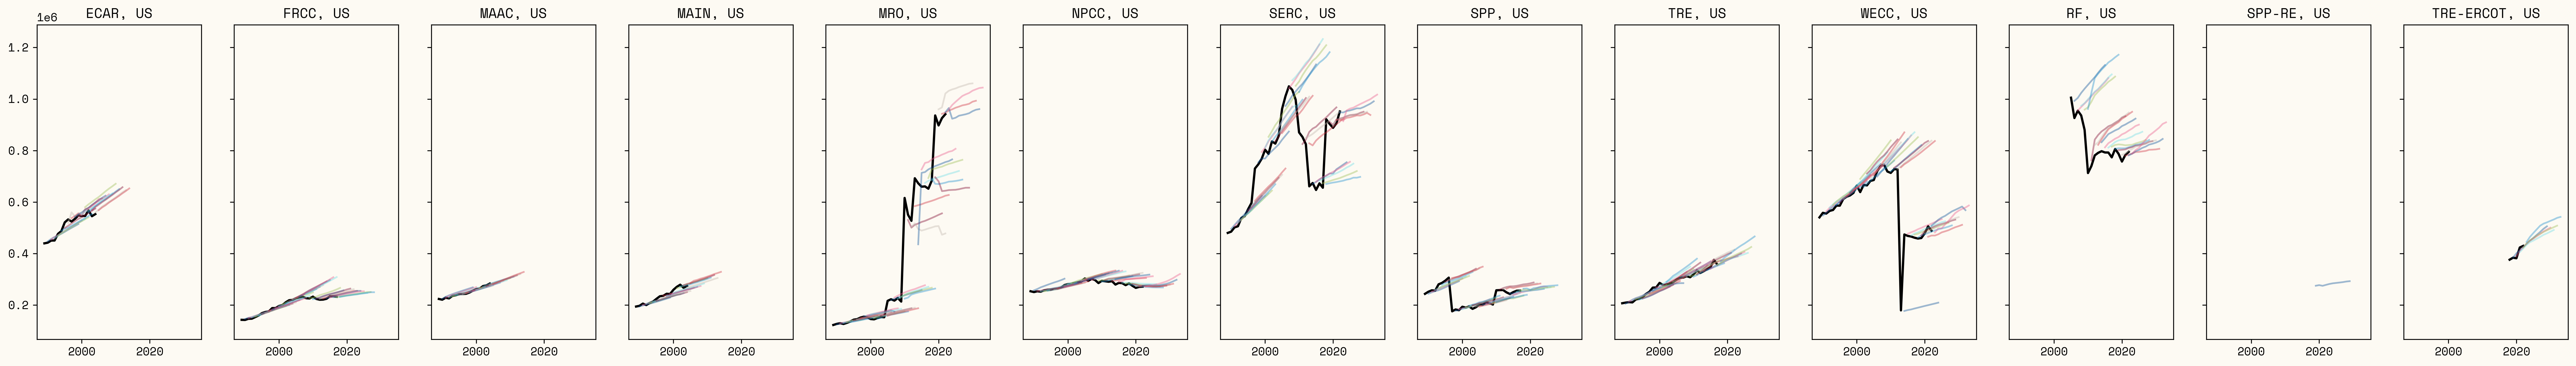

In [23]:
plot_all_regions_us(pivoted_nel_country_and_region_level_data[pivoted_nel_country_and_region_level_data['Country'] == 'US'])

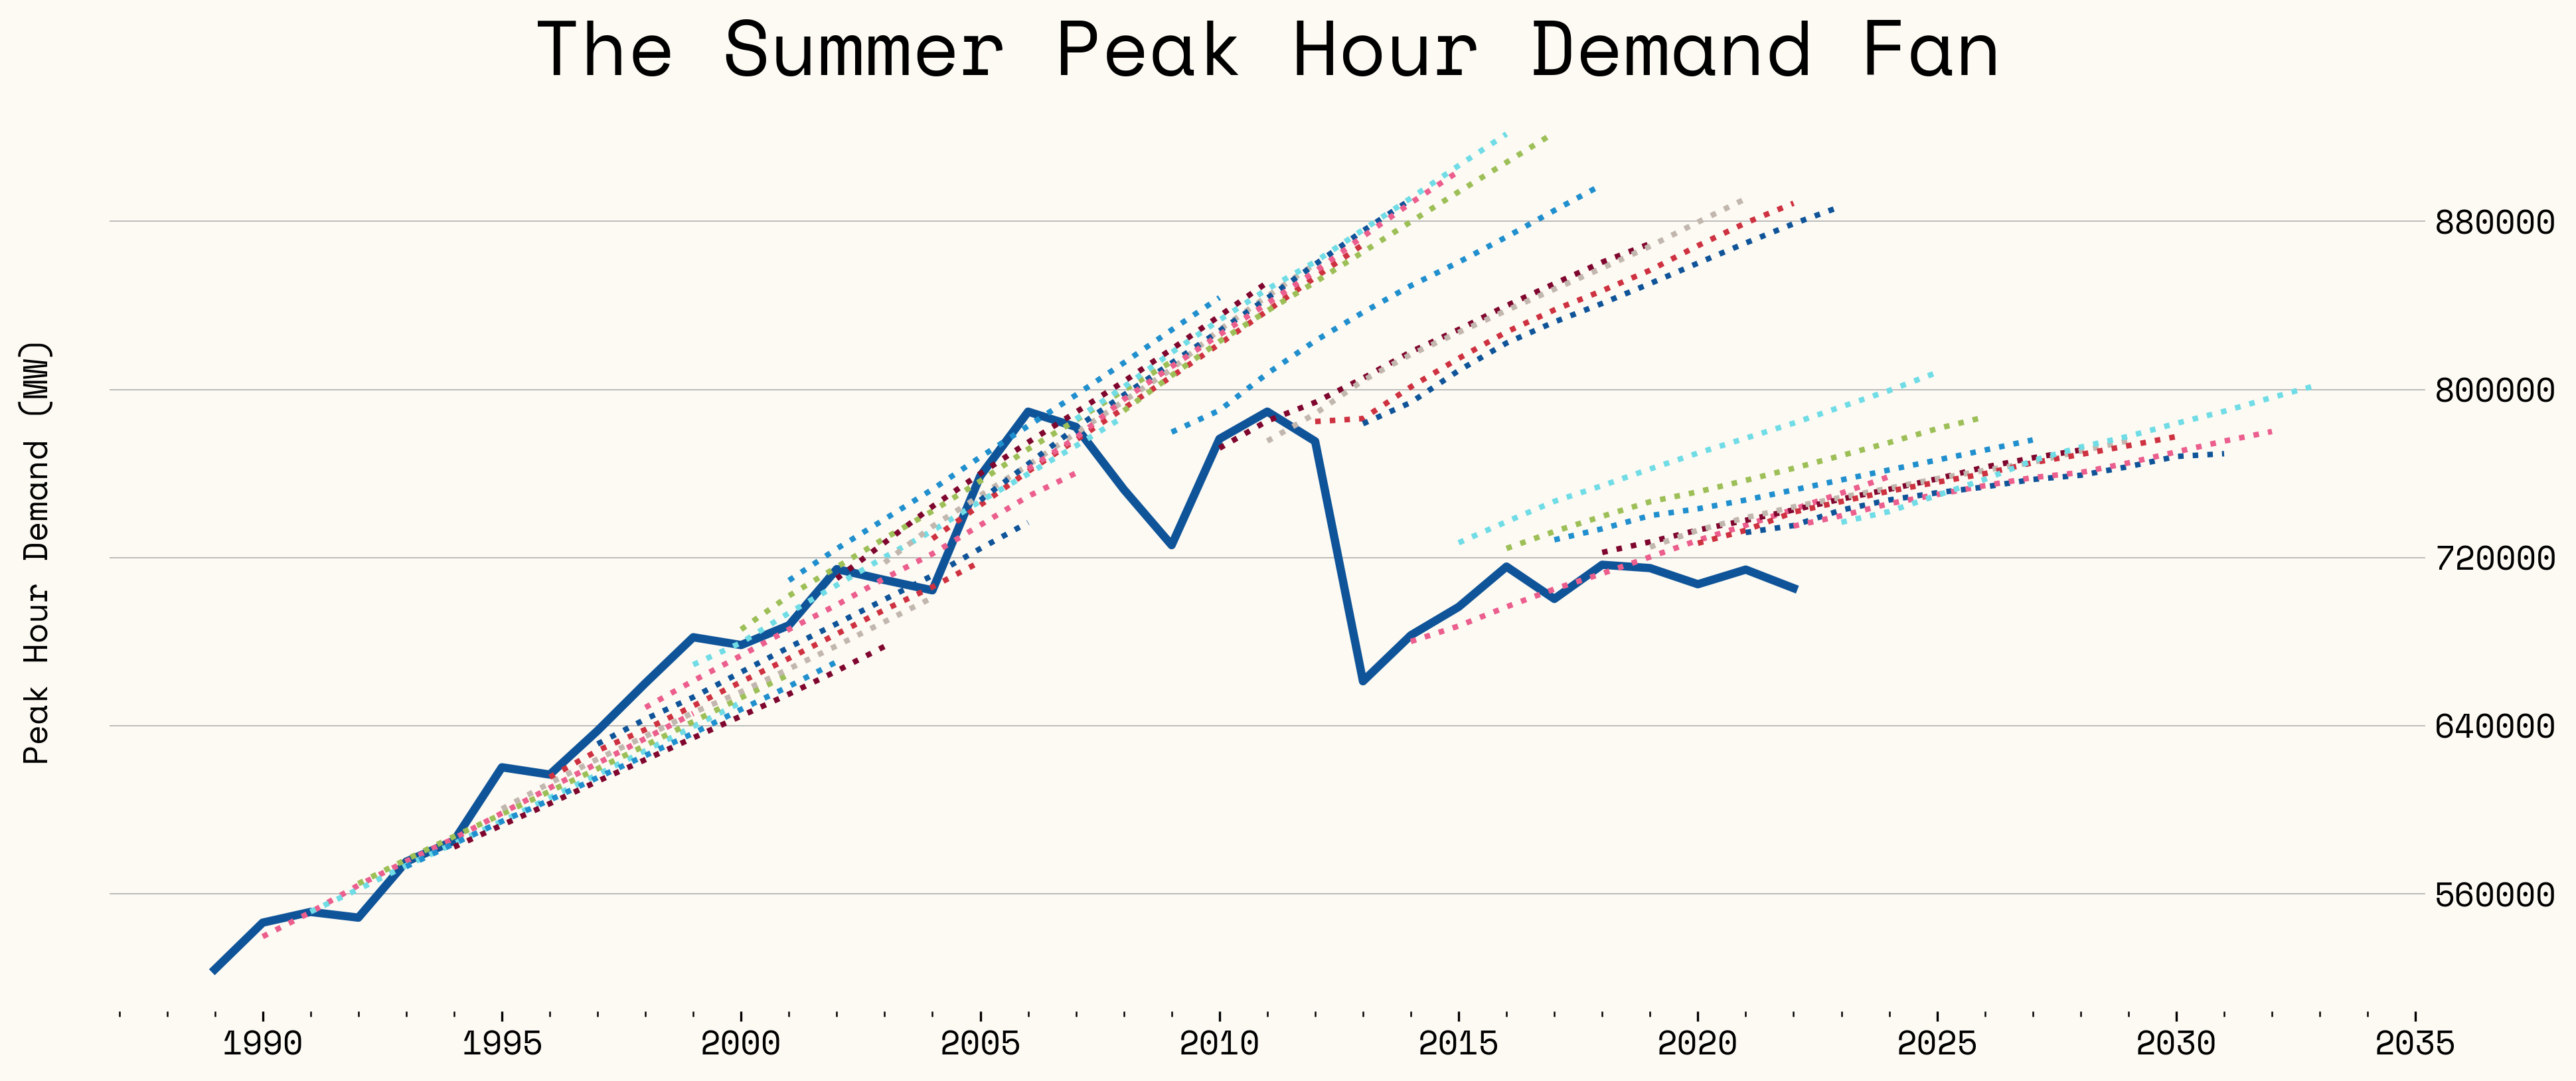

In [16]:
# What explains the big ole drop in 1998 in SPP? https://www.nerc.com/pa/RAPA/ra/Reliability%20Assessments%20DL/98ras.pdf it seems that
"""
"Former Southwest Power Pool (SPP) members Associated Electric Cooperative, Inc.,
Entergy Corporation, and Cajun Electric Power Cooperative are
now reporting in the SERC Region. Former SPP
member St. Joseph Light and Power Company is
now reporting in the MAPP Region. All future and
historical statistics stated herein are based on the
omission of data for these four companies. The peak
demand of SPP has been reduced by approximately
38% as a result of the departure of these former
members."
"""
# So it's actually good that we see that drop. It also means that this data doesn't make a ton of sense along reigonal lines because of exit and entry.
# Let's now aggregate across regions and limit it to the US
pd.set_option('display.max_rows', 500) 
#fig, axs = plt.subplots(len(regions), len(countries), figsize=(15, 45), sharex=True)

# New bug to work on! MISO didn't report a 10 year forecast for 2018 which is why the 2018 forecast drops at 2028.
# So we need to drop all of the 2018 10 year values so it just extends 9 years.

#Additionally, I believe the reason the 2014 forecast starts so low is a discrepancy with MISO reported numbers because it goes
# 662636.30	401778.00	678295.00 where the first is actual, year 0, year 1 so the jump is huge.
def plot_US_aggregate_fan(pivoted_input_dat, title, yaxis_label, filename, is_nel=False):
    filtered_data = pivoted_input_dat[(pivoted_input_dat['Country'] == 'US')]
    forecast = filtered_data[filtered_data['variable'] != "Actual"]
    actual = filtered_data[filtered_data['variable'] == "Actual"]
    # remove NaNs from forecast (all year 10 it seems)
    forecast = forecast.dropna()
    forecast_by_year = forecast.groupby(['Report Year', 'Country', 'Forecast Year'], as_index=False).sum(numeric_only=True)
    #print(forecast_by_year.tail(120))
    actual_by_year = actual.groupby(['Report Year', 'Country', 'Forecast Year'], as_index=False).sum(numeric_only=True)
    #print(forecast.tail(20))
    # Okay so manually adding up all the regions in the US for reporting year 1990 + forecast year 1990, I get 469801
    # Calculate percent change and augment dataframe
    actual_by_year['pct_growth'] = actual_by_year['value'].pct_change()
    
    
    
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(111)
    # Remove the lines connecting ticks
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    # Since we have the grid, remove the y axis ticks
    labelsize=12
    ax.tick_params(axis="y", which="both", length=0, labelsize=labelsize)
    ax.tick_params(axis="x", which="both", labelsize=labelsize)
    ax.set_ylabel(yaxis_label, labelpad=20, fontsize=12)
    ax.yaxis.tick_right()
    ax.yaxis.set_major_locator(ticker.MaxNLocator(6))
    ax.grid(which="major", axis="y", lw=0.4)
    # Set x axis ticks to be every 5 years
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    # But with a minor tick for each year
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.title(title, fontsize=28)
    # add data annotations
    if is_nel:
        ax.annotate("""
        [1] In MISO's 2014 10 yr forecast, they reported a forecast of 401,778GWh for 2014. However, the next year they reported a
        forecast of 678295GWh -- a jump of about 260TWh. Indeed, the actual NEL for 2014 was 662636GWh. This heavy undeprediction
        seems like a data error to me.
        """, xy = (0, -.2), xycoords='axes fraction')
        ax.annotate("""
        [2] MISO didn't report a 10th year of forecasting data in their 2018 report, so I've only calculated the 2018 aggregate
        US forecast out 9 years.
        """, xy = (0, -.3), xycoords='axes fraction')
        # Drop the data mentioned in the above annotation
        forecast_by_year = forecast_by_year.drop(forecast_by_year[(forecast_by_year['Report Year'] == 2018) & (forecast_by_year['Forecast Year'] == 2028)].index)
        ax.annotate('[1] Potential error in MISO data', xy = (2014, 3200000))
    plt.plot(actual_by_year['Forecast Year'], actual_by_year['value'], linewidth=3)
    for report_year in forecast['Report Year'].unique():
        individual_forecast = forecast_by_year[forecast_by_year['Report Year'] == report_year]
        plt.plot(individual_forecast['Forecast Year'], individual_forecast['value'], linestyle='dotted', alpha=1, linewidth=2)
    plt.savefig(filename)

    return forecast_by_year, actual_by_year

peaks_forecast_by_year, peaks_actual_by_year = plot_US_aggregate_fan(pivoted_summer_country_and_region_level_data,"The Summer Peak Hour Demand Fan", "Peak Hour Demand (MW)", "summer_peak_hour_demand_fan.png")

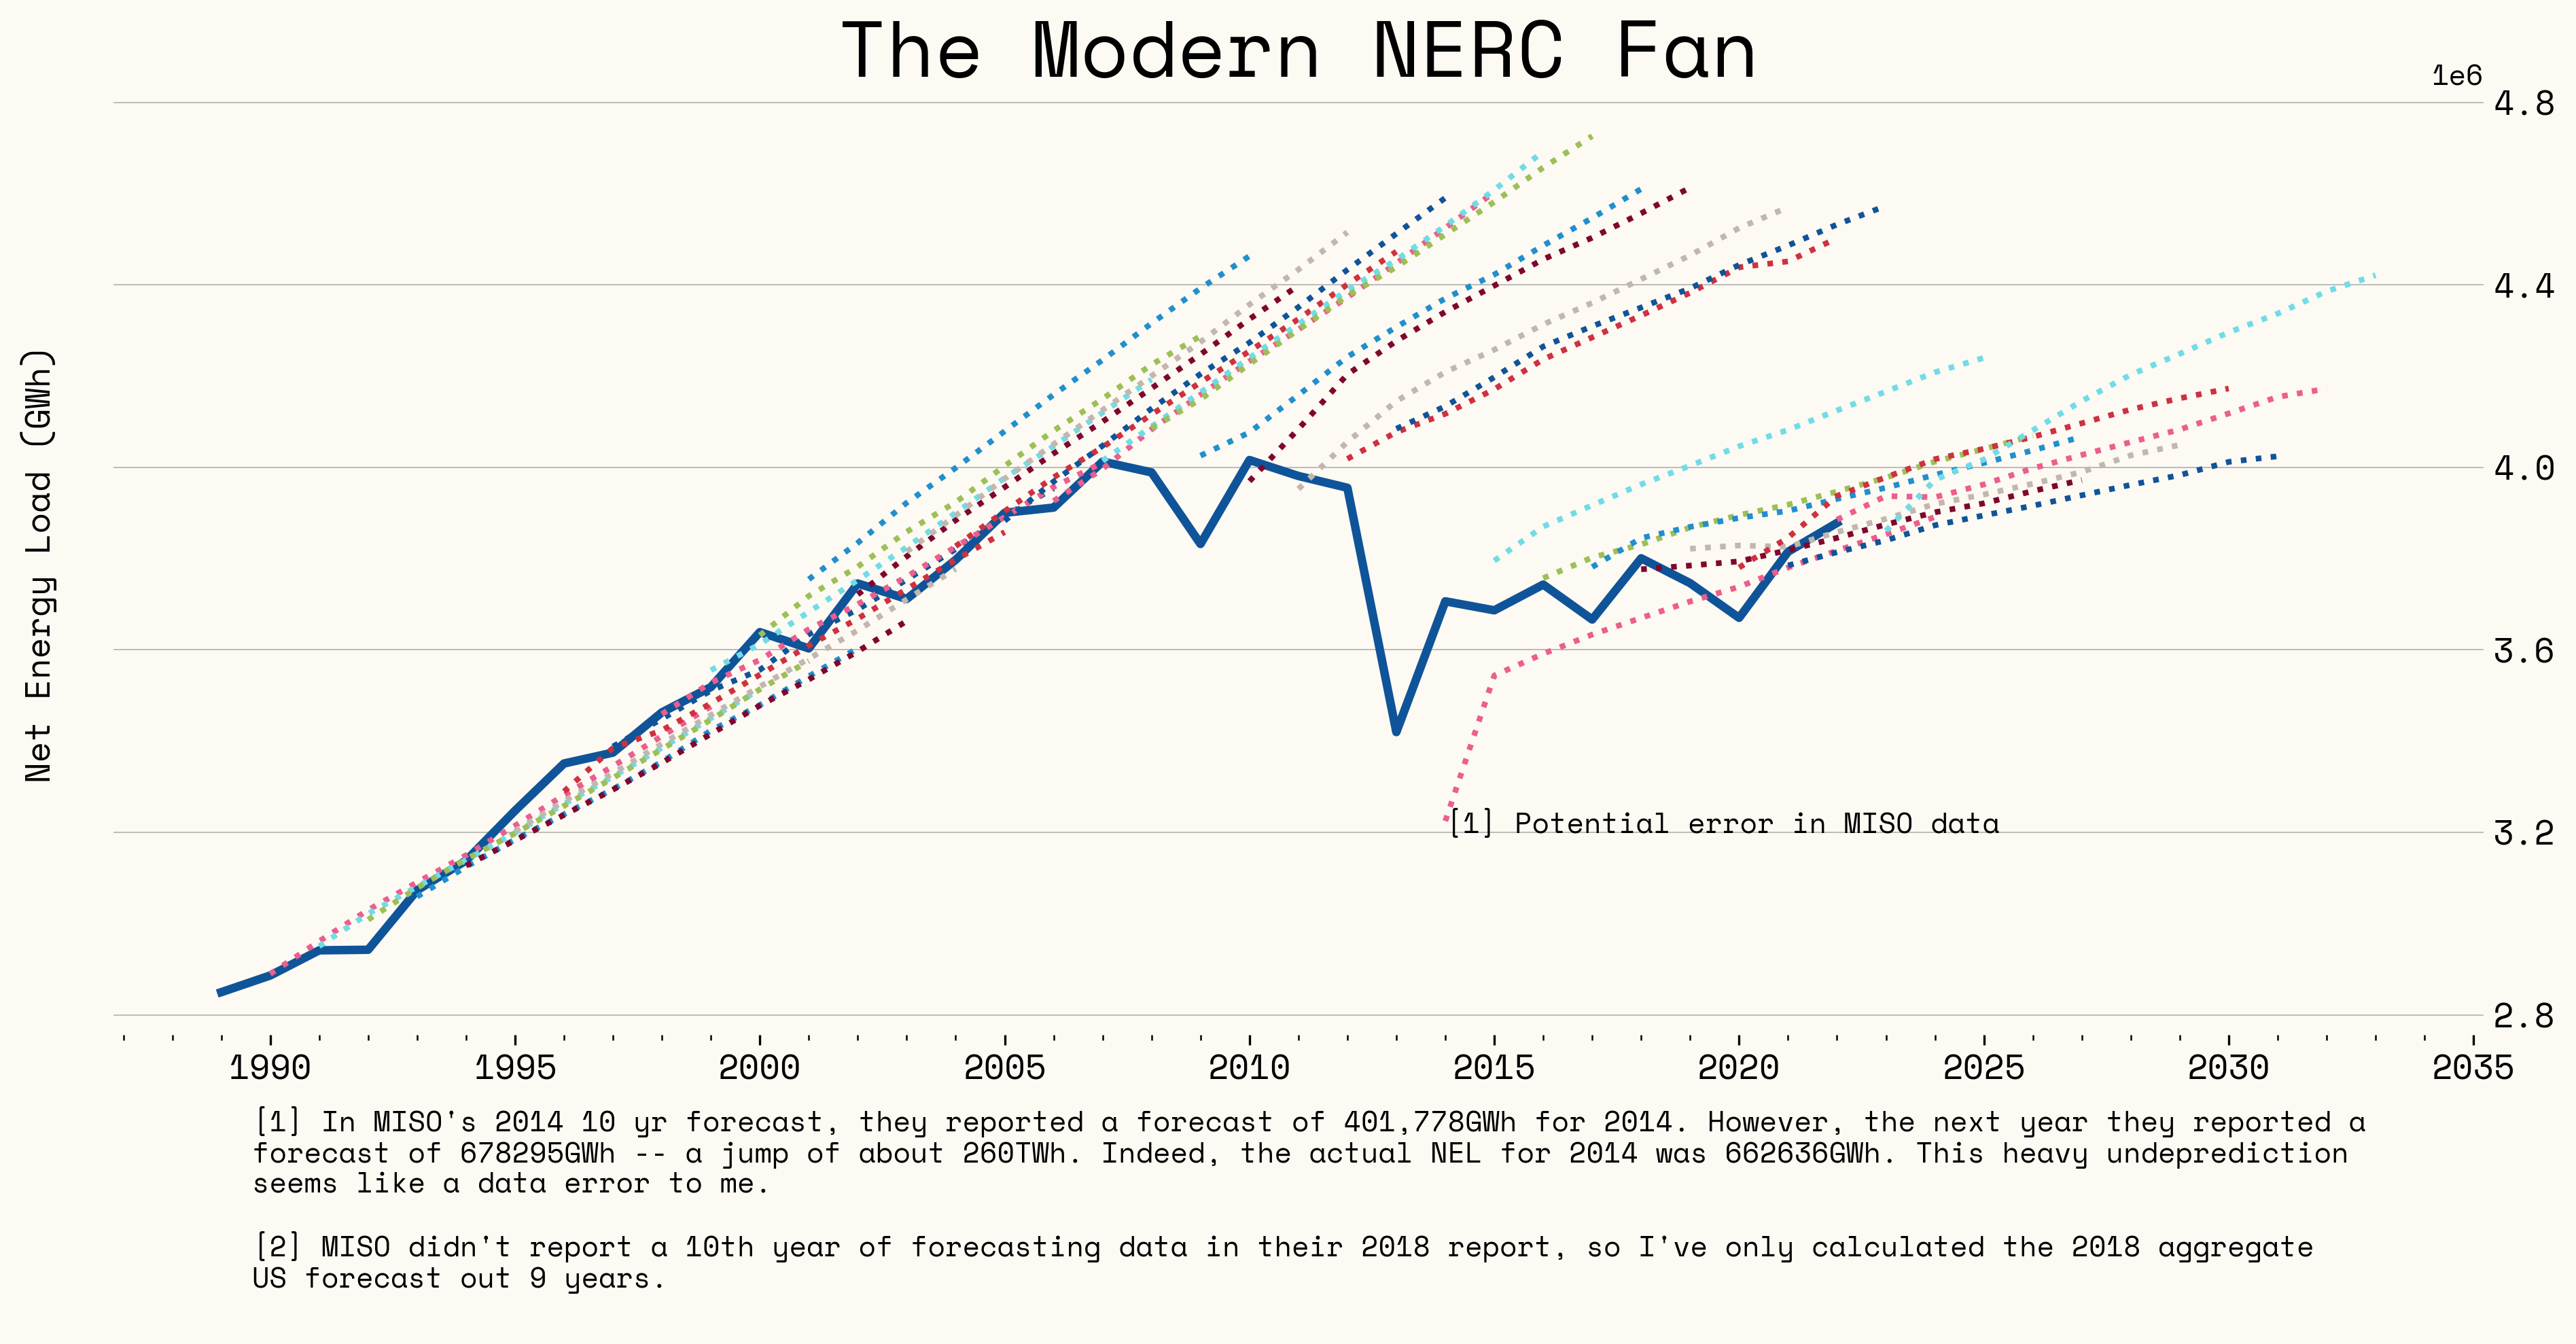

In [17]:
forecast_by_year, actual_by_year = plot_US_aggregate_fan(pivoted_nel_country_and_region_level_data, "The Modern NERC Fan", "Net Energy Load (GWh)", "modern_nerc_fan.png", True)


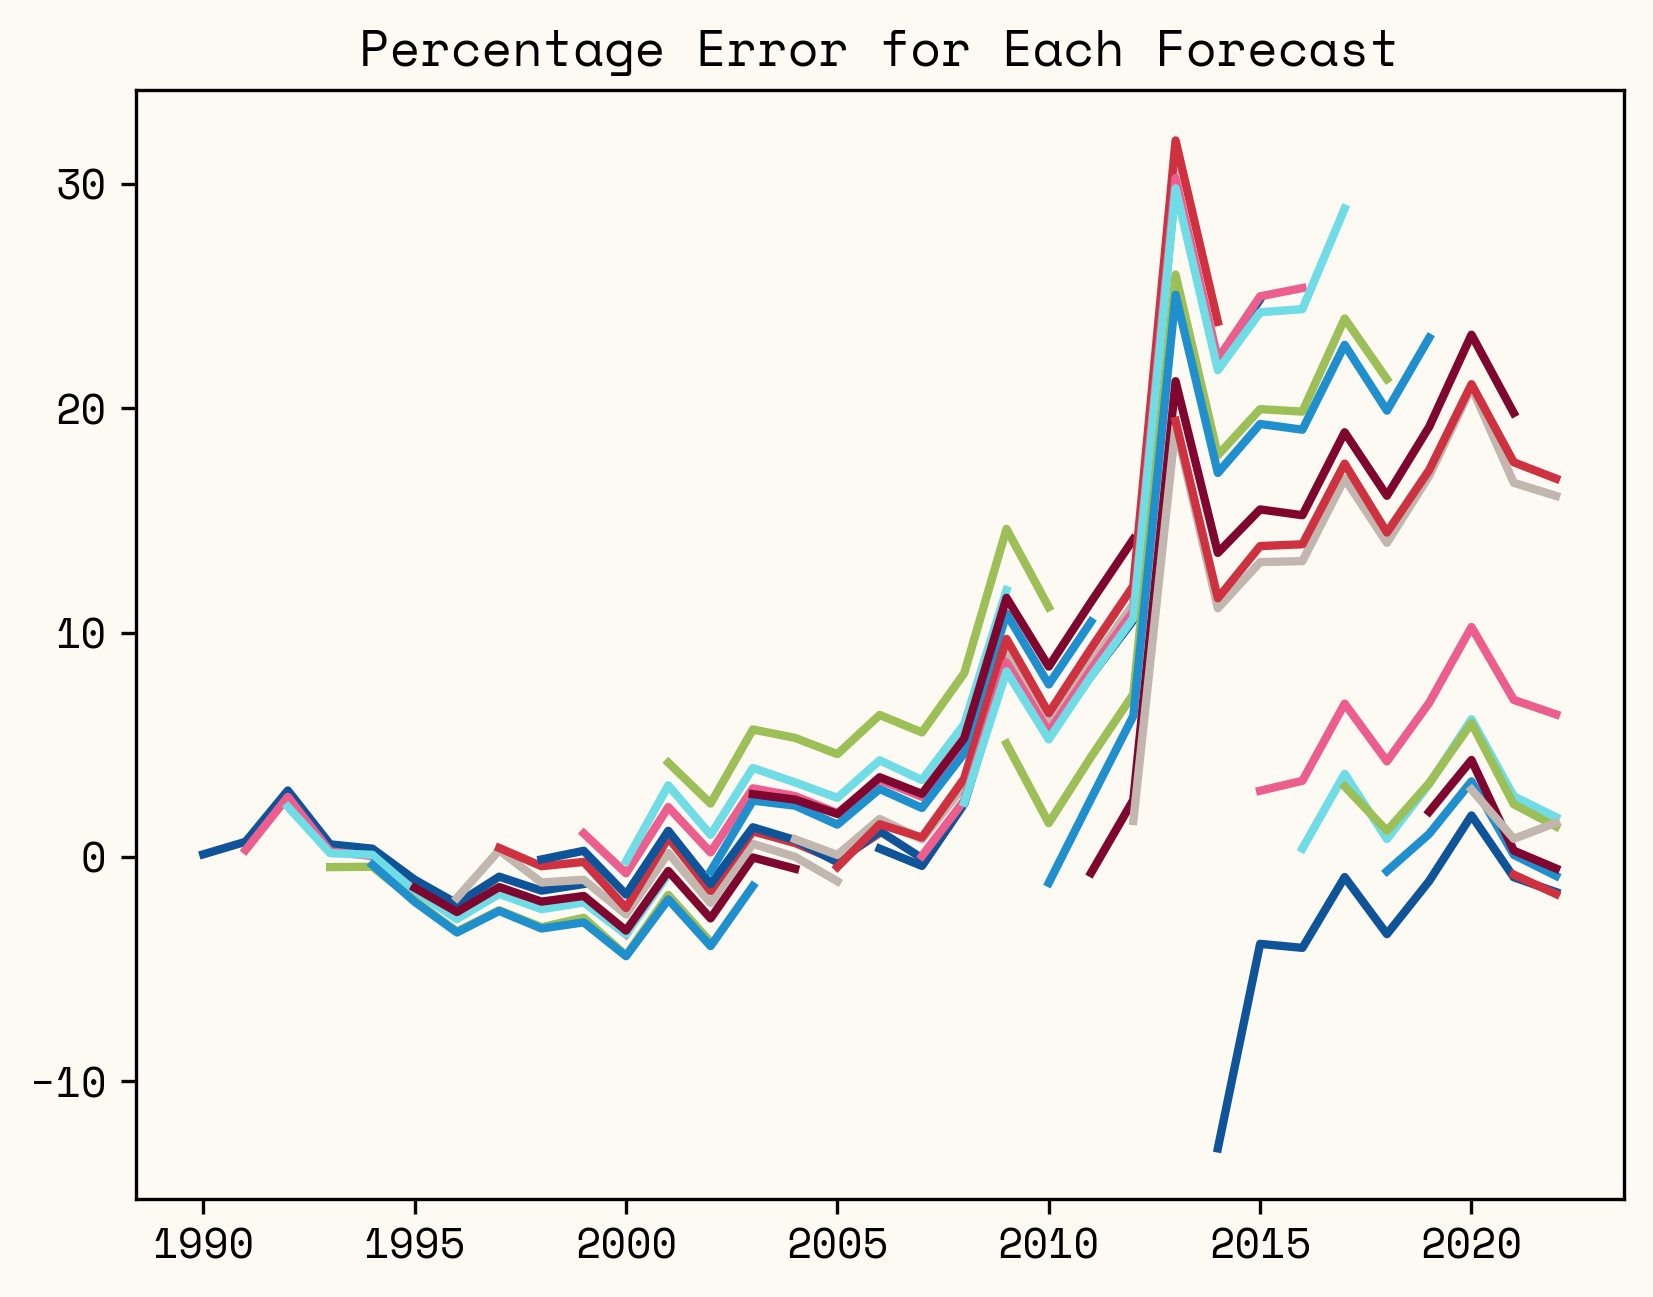

In [18]:
# Calculate errors now
merged_df = pd.merge(forecast_by_year, actual_by_year[['Country', 'Forecast Year', 'value']], 
                     on=['Country', 'Forecast Year'], suffixes=('_forecast', '_actual'))

# Calculate error (forecast value - actual value)
merged_df['error'] = merged_df['value_forecast'] - merged_df['value_actual']
merged_df['pct_error'] = (merged_df['value_forecast'] - merged_df['value_actual']) / merged_df['value_actual'] * 100
merged_df['years_out'] = merged_df['Forecast Year'] - merged_df['Report Year']
merged_df.head(20)
plt.title("Percentage Error for Each Forecast")
for report_year in merged_df['Report Year'].unique():
    individual_forecast = merged_df[merged_df['Report Year'] == report_year]
    plt.plot(individual_forecast['Forecast Year'], individual_forecast['pct_error'], linewidth=2)
#plt.plot(merged_df['Forecast Year'], merged_df['error'])

In [19]:
merged_df[merged_df['years_out'] == 10 ]


Report Year Country  Forecast Year  value_forecast  value_actual  \
220         2011      US           2021      4569994.56    3815154.16   
231         2012      US           2022      4502371.28    3878302.56   

         error  pct_error  years_out  
220  754840.40  19.785318         10  
231  624068.72  16.091285         10

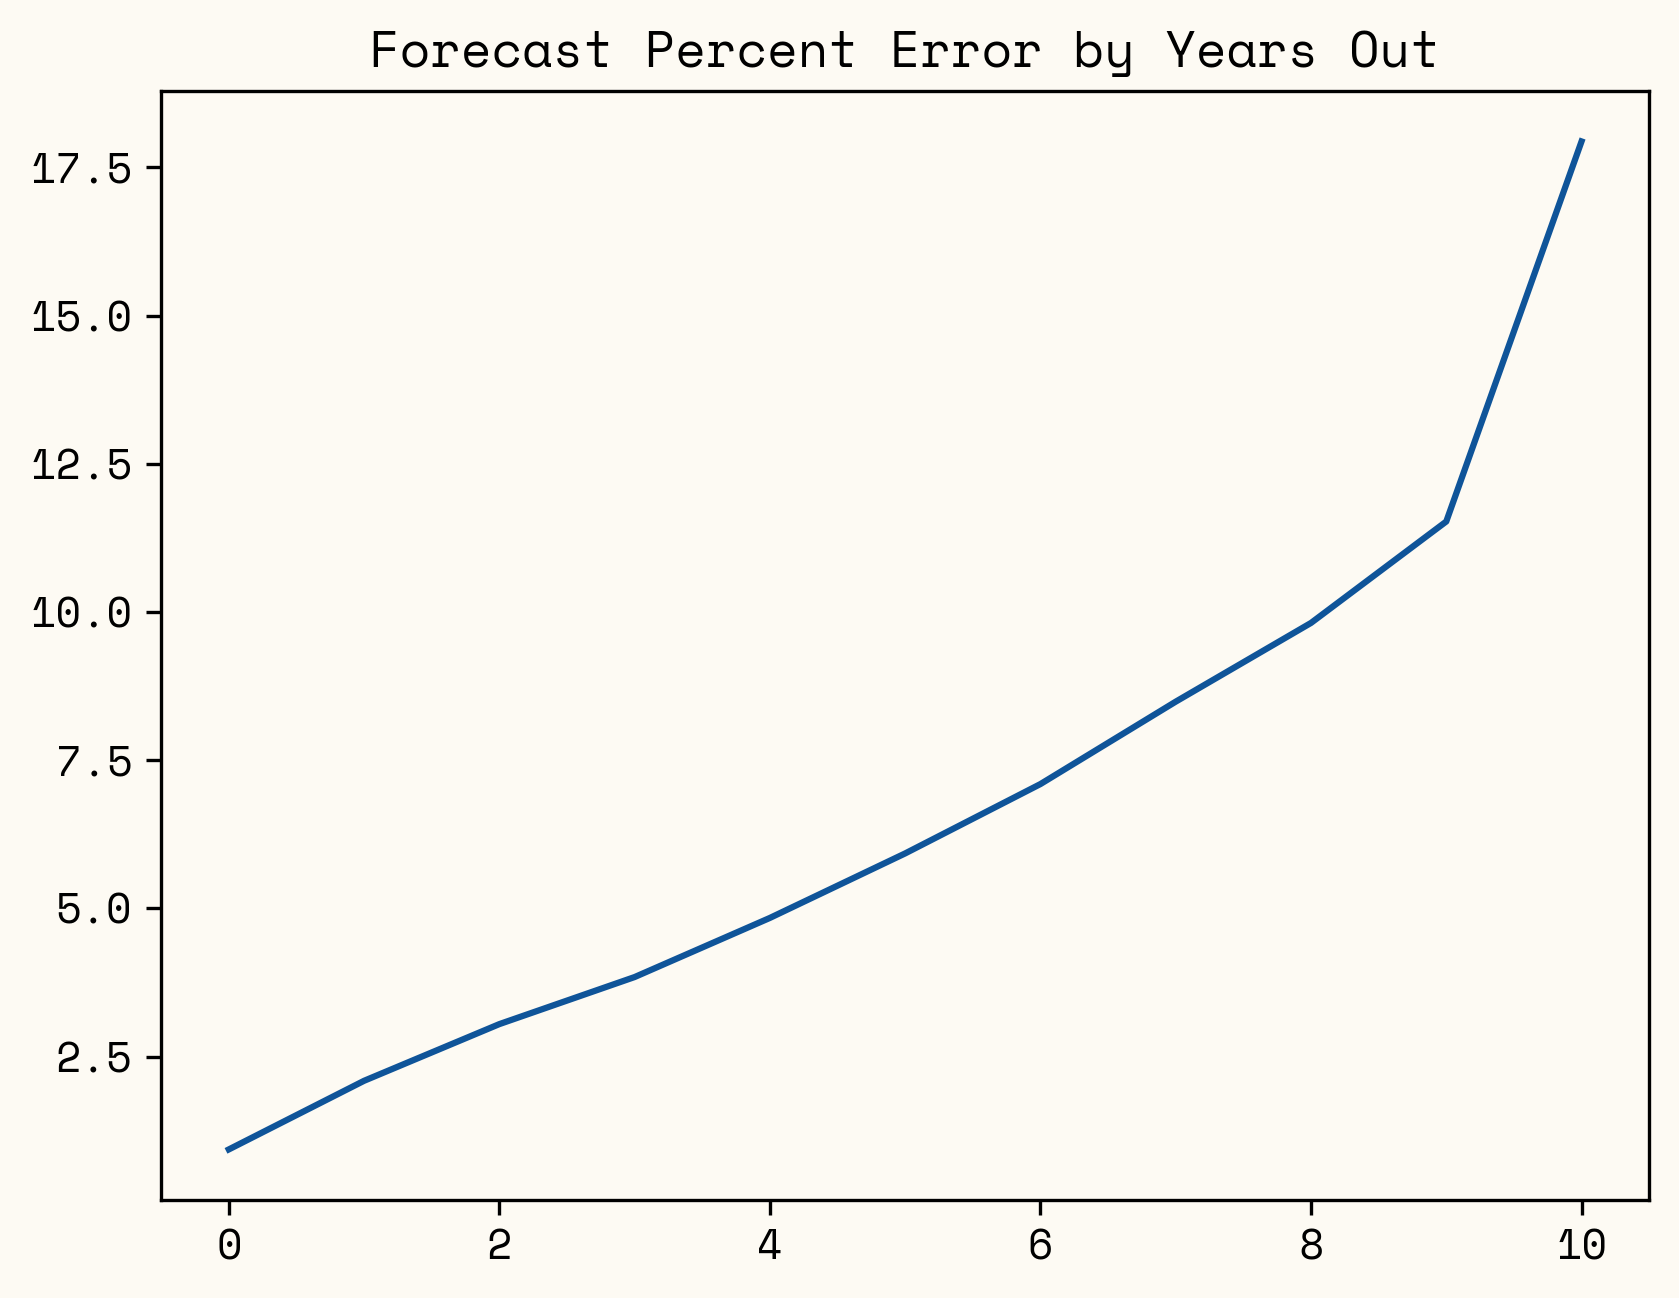

In [20]:
error_by_forecast_length = merged_df[['years_out', 'pct_error']].groupby(['years_out'], as_index=False).mean(numeric_only=True)
plt.title("Forecast Percent Error by Years Out")
plt.plot(error_by_forecast_length['years_out'], error_by_forecast_length['pct_error'])


In [21]:
error_by_forecast_length

years_out  pct_error
0           0   0.933234
1           1   2.091138
2           2   3.047444
3           3   3.841347
4           4   4.838850
5           5   5.927050
6           6   7.097145
7           7   8.487167
8           8   9.815209
9           9  11.526258
10         10  17.938302